In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy.stats as stats
import matplotlib
rads = ["#ea5545", "#e1a692", "#DD7596", '#9A3B3B', "#b30000"]
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'

In [21]:

plt.rcParams.update(matplotlib.rcParamsDefault)

In [22]:
results_path = "/Volumes/noamaz/modularity/xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
task_name = 'XOR'
task = "xor"
num_layers = "4"
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"{task}_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/xor_multi_arch/{res_folder}"

In [23]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = "2023-11-16-14-52-18_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"
lgbm_folder_name = 'exp_2023-11-16-17-38-02_nice_features'
n_features = 5

In [24]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [25]:
for file_name in os.listdir(lgb_res_path):
    if "._" in file_name:
        continue
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    if '2023-12-26' in file_name:
        feature_selection_res = pd.read_csv(f"{lgb_res_path}/{file_name}")
feature_selection_res = feature_selection_res.sort_values('num_features')
feature_selection_res

,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var
13,13,2023-11-16-17-38-02_masked_data_1_features,1,0.036350,0.001309,0.036302,0.001307
8,8,2023-11-16-17-38-02_masked_data_2_features,2,0.032221,0.000770,0.032184,0.000768
17,17,2023-11-16-17-38-02_masked_data_3_features,3,0.027799,0.000801,0.027807,0.000792
16,16,2023-11-16-17-38-02_masked_data_4_features,4,0.023526,0.000693,0.023742,0.000719
2,2,2023-11-16-17-38-02_masked_data_5_features,5,0.018446,0.000417,0.019161,0.000449
15,15,2023-11-16-17-38-02_masked_data_6_features,6,0.020879,0.000473,0.021461,0.000500
5,5,2023-11-16-17-38-02_masked_data_7_features,7,0.021650,0.000453,0.022343,0.000474
14,14,2023-11-16-17-38-02_masked_data_8_features,8,0.016936,0.000358,0.017819,0.000390
0,0,2023-11-16-17-38-02_masked_data_9_features,9,0.029886,0.000461,0.030301,0.000481
1,1,2023-11-16-17-38-02_masked_data_10_features,10,0.018713,0.000305,0.019499,0.000347


In [26]:
corr_path = f"{results_path}/{res_folder}/feature_correlation/{n_features}_features/"
corr_baseline_res = pd.DataFrame()
for file_name in os.listdir(corr_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    corr_baseline_res = pd.read_csv(f"{corr_path}/{file_name}")
corr_baseline_res = corr_baseline_res[corr_baseline_res['mape'] <= 0.4]

In [27]:
baseline_path = f"{results_path}/{res_folder}/random_feature_selection/{n_features}_features/"
for file_name in os.listdir(baseline_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    res_baseline = pd.read_csv(f"{baseline_path}/{file_name}")
res_baseline = res_baseline[res_baseline['mape'] <= 0.4]

In [28]:
globality_path = f"{results_path}/{res_folder}/feature_globality/{n_features}_features/"
for file_name in os.listdir(globality_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    globality_baseline_res = pd.read_csv(f"{globality_path}/{file_name}")
globality_baseline_res = globality_baseline_res[globality_baseline_res['mape'] <=0.4]

In [29]:
globality_baseline_res

,Unnamed: 0.1,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,exp_name,mape,mape_var
0,0,0.0,476.0,0.026267,0.025022,0.000024,0.000023,0.954264,0.956309,2023-12-09-14-37-14_5_features_144,0.025154,0.000767
1,1,0.0,274.0,0.023768,0.022613,0.000022,0.000021,0.962299,0.964167,2023-12-09-14-38-24_5_features_223,0.026192,0.000615
2,2,0.0,464.0,0.025445,0.024343,0.000023,0.000023,0.956005,0.957774,2023-12-09-14-38-35_5_features_226,0.026571,0.000729
3,3,0.0,489.0,0.023866,0.023122,0.000022,0.000021,0.961655,0.964189,2023-12-09-14-27-36_5_features_123,0.025238,0.000608
4,4,0.0,492.0,0.025393,0.024440,0.000023,0.000023,0.957176,0.958934,2023-12-09-14-27-34_5_features_112,0.025652,0.000673
...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,0.0,486.0,0.025939,0.024732,0.000024,0.000023,0.955228,0.956777,2023-12-09-14-37-22_5_features_153,0.026675,0.000764
298,298,0.0,474.0,0.020403,0.019406,0.000019,0.000018,0.971820,0.973518,2023-12-09-14-27-34_5_features_118,0.020701,0.000470
299,299,0.0,478.0,0.026697,0.025403,0.000024,0.000024,0.951895,0.955683,2023-12-09-14-37-33_5_features_209,0.025812,0.000754
300,300,0.0,498.0,0.025514,0.024679,0.000023,0.000022,0.958715,0.960797,2023-12-09-14-37-57_5_features_186,0.024596,0.000711


In [30]:
all_data = [
    res_baseline['mape'],
    globality_baseline_res['mape'],
    corr_baseline_res['mape'],
    feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features],
]
labels = [
    'randomly chosen\nfeatures',
    'globality based randomly\nchosen features',
    'features correlated\nwith chosen features',
    'chosen with\nfeature selection',
]
plt.figure(figsize=(7, 8), )

plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(rads[2])
for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans',):
    vp = parts[partname]
    vp.set_edgecolor(rads[3])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=18)
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

KeyError: 'best mape test'

<Figure size 640x480 with 0 Axes>

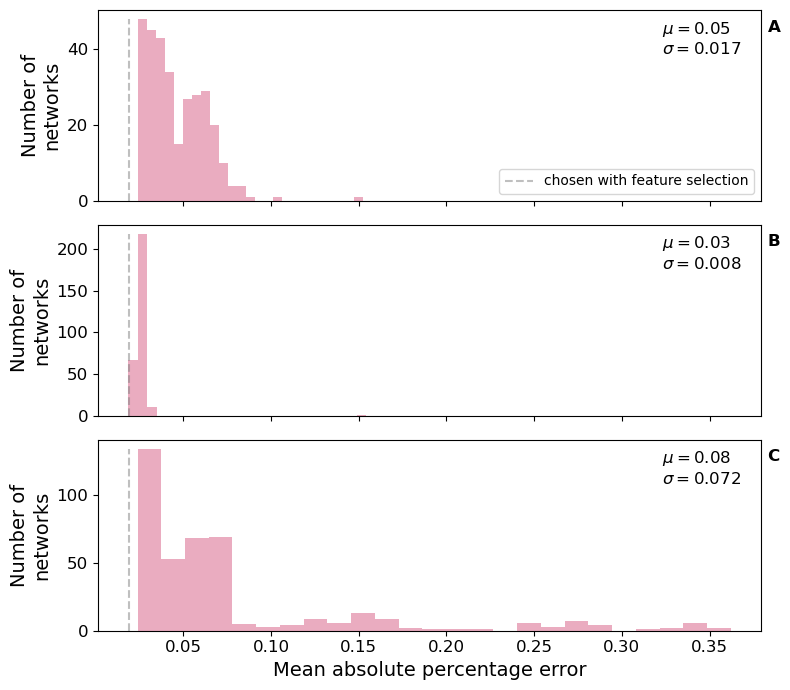

In [31]:
feature_sellection_val = feature_selection_res['test_mape'][
    feature_selection_res['num_features'] == n_features].item()

all_data = [
    res_baseline['mape'],
    globality_baseline_res['mape'],
    corr_baseline_res['mape'],
]
labels = [
    'randomly chosen features',
    'globality based randomly chosen features',
    'correlation based chosen features'
]
nums=['A', 'B', 'C']
plt.figure()
fig, axs = plt.subplots(3, 1, figsize=(8, 7), sharex='all')
for i, (baseline, lab) in enumerate(zip(all_data, labels)):
    mu, std = stats.norm.fit(baseline)
    n, _, _ = axs[i].hist(baseline, bins=25, alpha=0.6, color=rads[2])
    #axs[i].set_title(f"{lab}", fontsize=13)
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu),
        r'$\sigma=%.3f$' % (std)))
    axs[i].text(0.85, 0.95, textstr, transform=axs[i].transAxes, fontsize=12, verticalalignment='top', )
    axs[i].text(1.01, 0.95, nums[i], transform=axs[i].transAxes, fontsize=12, verticalalignment='top',  weight="bold")
    axs[i].vlines(x=feature_sellection_val, ymin=0,
                  ymax=max(n), colors='grey', linestyles='--', alpha=0.5,
                  label='chosen with feature selection')
    axs[i].set_ylabel('Number of\nnetworks', fontsize=14)
    axs[i].tick_params(axis='both',  labelsize=12)
axs[2].set_xlabel('Mean absolute percentage error', fontsize=14)
axs[0].legend(loc='lower right', )
#plt.suptitle(f'Digit recognition - performance of alternative feature selection methods', fontsize=13)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_feature_swapping.png")
plt.show()

In [32]:
feature_sellection_val

0.0191613554248621

In [33]:
all_f_names = pd.read_csv(f"{results_path}/{res_folder}/all_feature_names.csv")['0'].tolist()

In [34]:
globality_level = {
    1: [
        'connectivity_ratio',
        'num_connections',
        'max_possible_connections',
        'motifs_count',
        'dimensions',
        'num_layers',
        'num_neurons'
    ],
    0.75: [
        'total_connectivity_ratio_between_layers',
        'max_connectivity_between_layers_per_layer',
        'layer_connectivity_rank',
    ],
    0.5: [
        'distances_between_input_neuron',
        'num_paths_to_output_per_input_neuron',
        'num_involved_neurons_in_paths_per_input_neuron',
    ],
    0: [
        'out_connections_per_layer',
        'in_connections_per_layer',
    ]
}
def get_glob_level(feature_full_name):
    for globality_idx, features_list in globality_level.items():
        for f in features_list:
            if f == 'connectivity_ratio' and f != feature_full_name:
                continue
            if f in feature_full_name:
                return globality_idx


In [35]:
single_feature_path = f"{results_path}/{res_folder}/single_feature_prediction/"
single_feature_baseline_res = pd.DataFrame()
for file_name in os.listdir(single_feature_path):
    if '_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{single_feature_path}/{file_name}")
    feature_ind =  int(file_name.split('feature_')[1].split('_best.csv')[0]) -1
    temp['feature_ind'] = feature_ind
    feature_name = all_f_names[feature_ind]
    temp['feature_name'] = feature_name
    temp['feature_globality_level'] =  get_glob_level(feature_name)
    single_feature_baseline_res = pd.concat([single_feature_baseline_res, temp], ignore_index=True)

In [36]:
single_feature_baseline_res

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,feature_ind,feature_name,feature_globality_level
0,0,468,0.085557,0.085480,0.000072,0.000073,0.585900,0.582383,80,num_involved_neurons_in_paths_per_input_neuron...,0.50
1,0,449,0.057872,0.057546,0.000051,0.000050,0.792687,0.798686,48,total_connectivity_ratio_between_layers_1,0.75
2,0,430,0.090481,0.089846,0.000076,0.000075,0.544323,0.551921,52,max_connectivity_between_layers_per_layer_1,0.75
3,0,238,0.090653,0.091311,0.000073,0.000074,0.569215,0.566290,32,in_connections_per_layer_(1_ 1),0.00
4,0,189,0.131309,0.131146,0.000096,0.000095,0.262886,0.278330,18,out_connections_per_layer_(2_ 3),0.00
...,...,...,...,...,...,...,...,...,...,...,...
91,0,113,0.146894,0.145097,0.000105,0.000104,0.120506,0.140470,45,in_connections_per_layer_(4_ 0),0.00
92,0,467,0.047214,0.046018,0.000042,0.000042,0.858589,0.861187,47,total_connectivity_ratio_between_layers_0,0.75
93,0,480,0.104357,0.105315,0.000081,0.000082,0.474814,0.473308,3,out_connections_per_layer_(0_ 0),0.00
94,0,432,0.094272,0.093256,0.000074,0.000073,0.564793,0.575289,33,in_connections_per_layer_(1_ 2),0.00


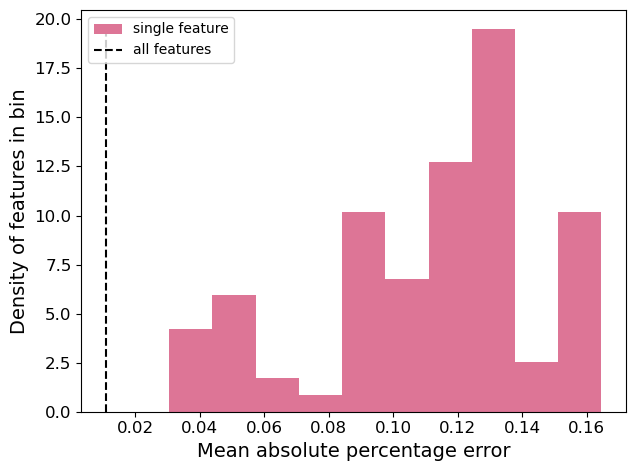

In [38]:
n, _, _ = plt.hist(single_feature_baseline_res['best mape test'][single_feature_baseline_res['best mape test'] < 0.7],
                   density=True, color=rads[2],  label='single feature')
feature_sellection_max_val =0.011
plt.vlines(x=feature_sellection_max_val, ymin=0,
                  ymax=max(n), colors='black', linestyles='--',
                  label='all features')
plt.xlabel('Mean absolute percentage error', fontsize=14)
plt.ylabel('Density of features in bin', fontsize=14)
#plt.title(f"{task.capitalize()} - prediction performance using a single feature", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_single_features.png")
plt.show()

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_96993/2954643722.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level][single_feature_baseline_res['best mape test'] < 0.7]['best mape test']


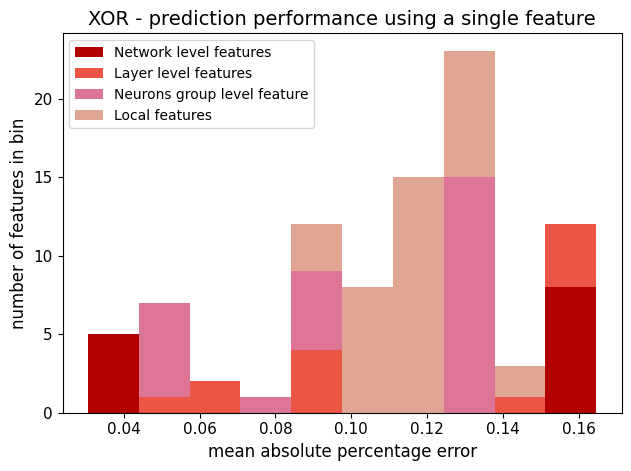

In [33]:
g_single_feature_baseline_res = [
    single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level][single_feature_baseline_res['best mape test'] < 0.7]['best mape test']
    for g_level in globality_level.keys()
]
glob_levels_names = {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Neurons group level feature",
    0: "Local features"
}
rads_blues =  ["#b30000", "#ea5545", COLORS[2], "#e1a692",  ]
n, p, b = plt.hist(g_single_feature_baseline_res, stacked=True,
                   color=rads_blues,  label=list(glob_levels_names.values())
                    )
plt.xlabel('mean absolute percentage error', fontsize=12)
plt.ylabel('number of features in bin', fontsize=12)
plt.title(f"{task.upper()} - prediction performance using a single feature", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.legend()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_single_features_by_glob.png")
plt.show()

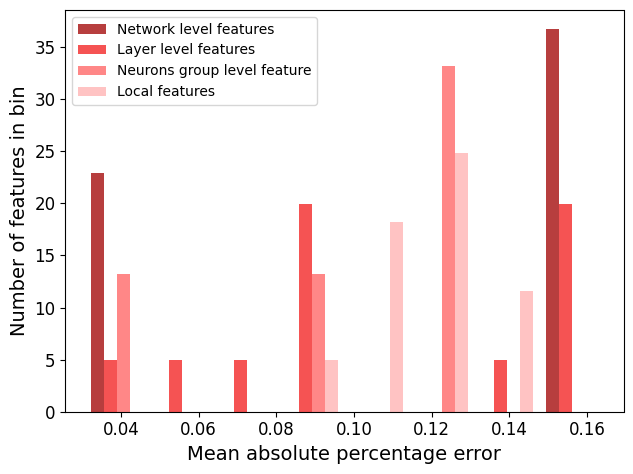

In [35]:
sorted_rads = [
    "#B73E3E",
"#F55353",
    '#FF8787',
    "#FFC3C3",
     #"#e1a692",
]
g_single_feature_baseline_res = [
    single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level]['best mape test'][single_feature_baseline_res['best mape test'] <0.4]
    for g_level in globality_level.keys()
]
glob_levels_names = {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Neurons group level feature",
    0: "Local features"
}
n, p, b = plt.hist(g_single_feature_baseline_res, bins=8, density=True,

                   color=sorted_rads, label=list(glob_levels_names.values())
                   )
plt.xlabel('Mean absolute percentage error', fontsize=14)
plt.ylabel('Number of features in bin', fontsize=14)
#plt.title(f"{task.capitalize()} - prediction performance using a single feature", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper left')
plt.savefig(
    f"{plot_path}/{time_str}_{task}_single_features_by_glob.png")
plt.show()

In [70]:
feature_selection_res['num_features'] .max()

96

In [171]:
for a, l in zip(all_data, labels):
    print(f"{l}: {round(a.mean(),4), round(a.min(),4)}")

randomly chosen features: (0.045, 0.0226)
globality based randomly chosen features: (0.0243, 0.0183)
correlation clusters based chosen features: (0.0445, 0.0238)


In [173]:
round(feature_sellection_val,4)

0.0189